## 1. Import Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

## 2. Load Dataset

In [71]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## 3. Data Preprocessing

In [72]:
# Check column names
print('Available columns:',df.columns.to_list())

Available columns: ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [73]:
# Drop irrelevant columns
df = df.drop(['Method','Regionname'],axis=1)
print('Available columns:',df.columns.to_list())

Available columns: ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount']


In [74]:
# Encode categorical variable 'Type'
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Define feature and target set (only existing columns)
features = ['Rooms','Type','Postcode','Distance','Propertycount']
target = ['Price']

In [75]:
# Drop missing values
df = df.dropna()

# Select features and target
X = df[features]
y = df[target]

## 4. Exploratory Data Analysis (EDA)

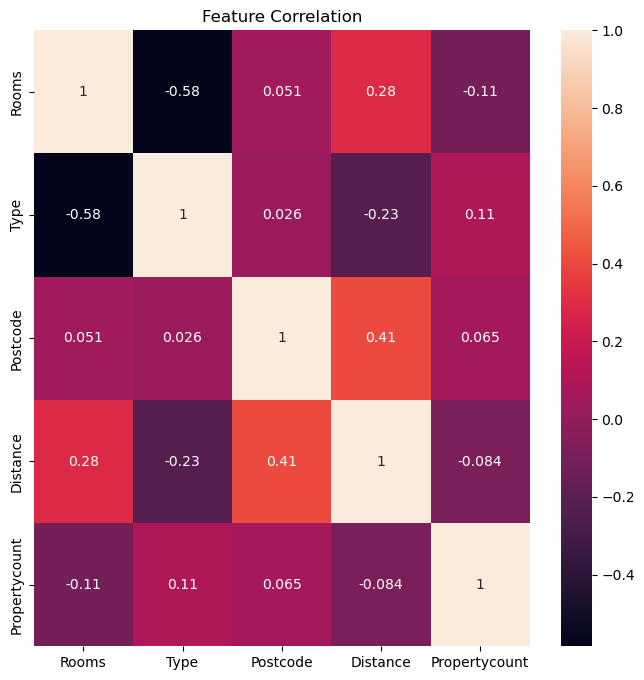

In [76]:
# Feature Correlation
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='rocket')
plt.title('Feature Correlation')
plt.show()

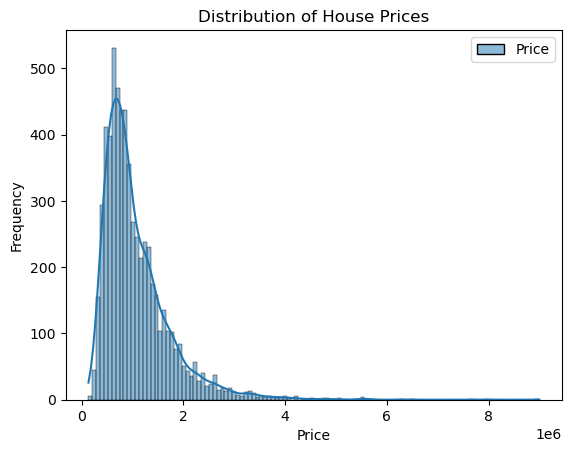

In [77]:
# Distribution of House Prices
sns.histplot(y, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## 5. Train/Test Split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Model Training with XGBoost

In [79]:
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.7,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

## 7. Model Evaluation

In [80]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 105210314752.0
R2 Score: 0.7468788623809814


## 8. Visualize Predictions

In [81]:
print(type(y_pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [82]:
# Converting y_test to Series for plotting
y_test_series = y_test['Price']

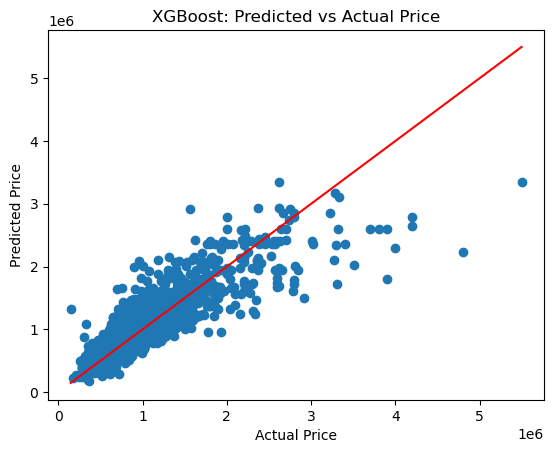

In [83]:
plt.scatter(y_test_series, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Predicted vs Actual Price')
plt.plot([min(y_test_series), max(y_test_series)], [min(y_test_series), max(y_test_series)], color='red')
plt.show()

## 9. Feature Importance

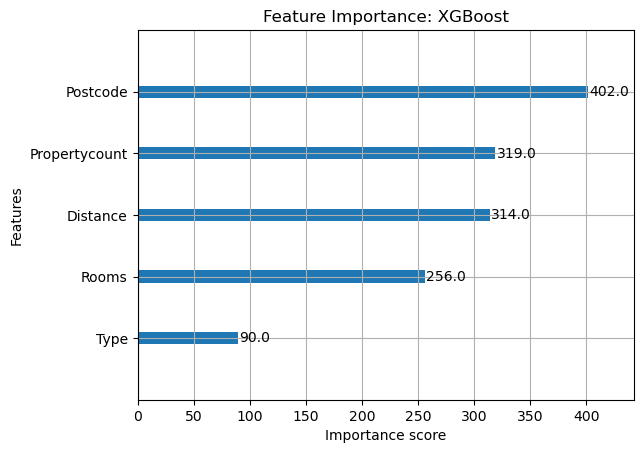

In [84]:
from xgboost import plot_importance

plot_importance(model)
plt.title('Feature Importance: XGBoost')
plt.show()

## 10. Make Predictions

In [88]:
# Example input: [Rooms, Type, Distance, Propertycount, Postcode]
# Type must be encoded (e.g. h=0, u=1, t=2)
sample_input = np.array([[3,0,3000,10.2,1000]])
predicted_price = model.predict(sample_input)
price = round(predicted_price[0], 0)    # round off to nearest integer
print(f'Predicted Price: ${price}')

Predicted Price: $939832.0


## 11. Save Model

In [89]:
import joblib

joblib.dump(model, 'xgboost_house_price_model.pkl')
print("✅ Model saved as 'xgboost_house_price_model.pkl'")

✅ Model saved as 'xgboost_house_price_model.pkl'
